In [14]:
pip install sentinelsat


In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt



ValueError: Request parameter `data_folder` is not specified. In order to save data please set `data_folder` to location on your disk.

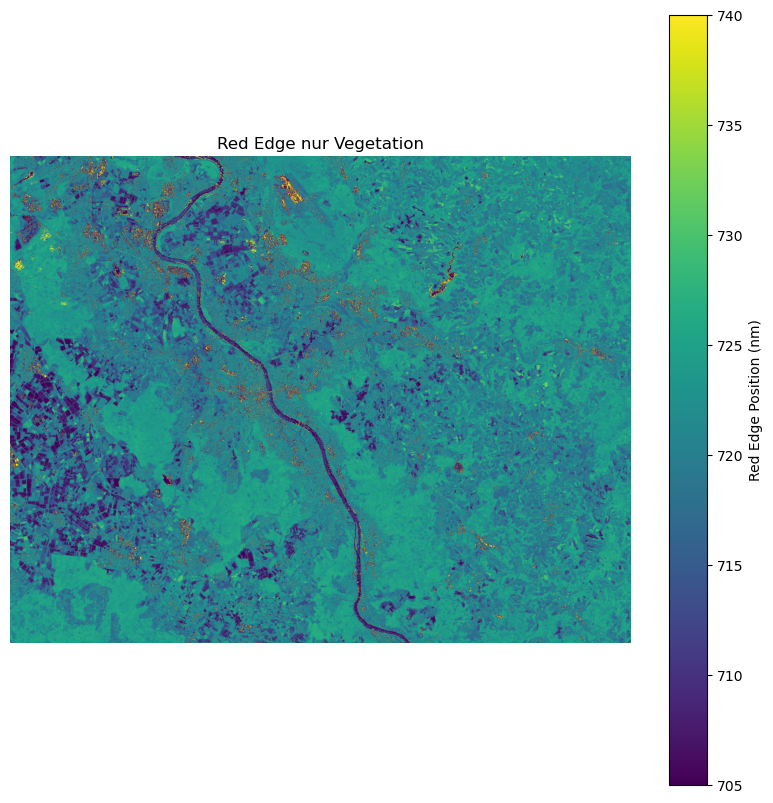

49882.004


In [36]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Basisordner
base_path = "/Users/andreas/PycharmProjects/Carto-GIS1/S2A_Bonn_2025_06_19/"

# Band-Pfade
b02_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B02_(Raw).tiff"
b03_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B03_(Raw).tiff"
b04_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B04_(Raw).tiff"
b05_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B05_(Raw).tiff"
b06_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B06_(Raw).tiff"
b07_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B07_(Raw).tiff"

b08_path = base_path + "2025-09-07-00:00_2025-09-07-23:59_Sentinel-2_L2A_B08_(Raw).tiff"


with rasterio.open(b04_path) as src:
    red = src.read(1).astype("float32") / 10000.0

with rasterio.open(b03_path) as src:
    green = src.read(1).astype("float32")/ 10000.0

with rasterio.open(b02_path) as src:
    blue = src.read(1).astype("float32")/ 10000.0
    
with rasterio.open(b05_path) as src:
    red_edge1 = src.read(1).astype("float32")/ 10000.0

with rasterio.open(b06_path) as src:
    red_edge2 = src.read(1).astype("float32")/ 10000.0

with rasterio.open(b07_path) as src:
    nir = src.read(1).astype("float32")/ 10000.0



# Berechne den Divisor
divisor = red_edge2 - red_edge1

# Maskiere alle Null-Divisionen (ersetze sie durch np.nan)
divisor_safe = np.where(divisor == 0, np.nan, divisor)

# Red Edge Position berechnen
Red_edge_Point_1 = 705 + 35 * ((red + nir)/2 - red_edge1) / divisor_safe

# Optional: alle NaNs durch 0 ersetzen, wenn du sie weiterverwenden willst
Red_edge_Point_1_clean = np.nan_to_num(Red_edge_Point_1, nan=0.0)

plt.figure(figsize=(10, 10))
plt.imshow(Red_edge_Point_1_clean, cmap="viridis", vmin=705, vmax=740)
plt.colorbar(label="Red Edge Position (nm)")
plt.title("Red Edge nur Vegetation")
plt.axis("off")
plt.show()

print(Red_edge_Point_1_clean.max())

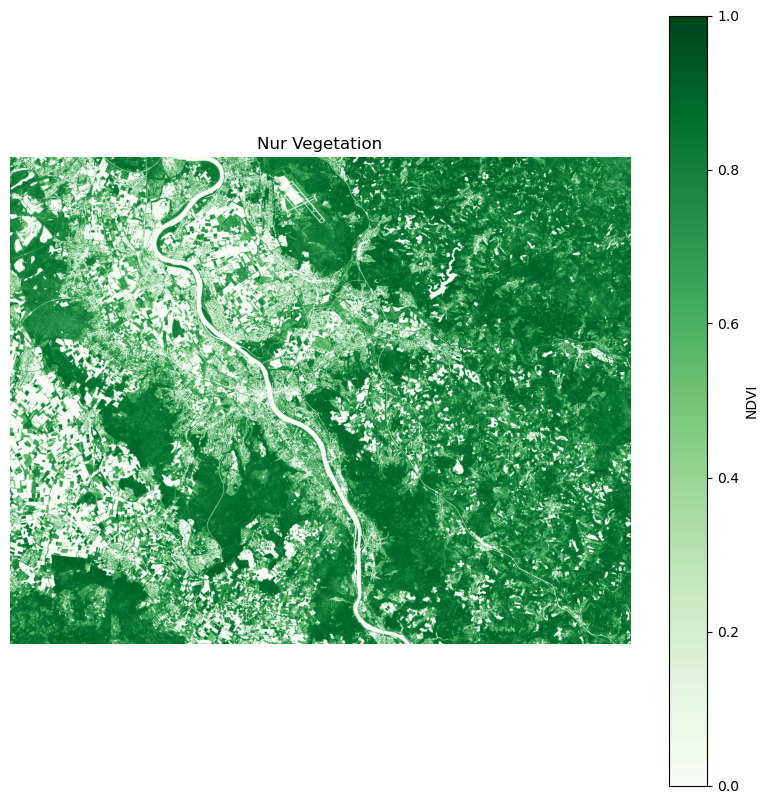

In [26]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Schwellenwert für Vegetation
veg_threshold = 0.4
vegetation_mask = ndvi >= veg_threshold

vegetation_ndvi = np.zeros_like(ndvi)
vegetation_ndvi[vegetation_mask] = ndvi[vegetation_mask]

plt.figure(figsize=(10, 10))
plt.imshow(vegetation_ndvi, cmap="Greens")
plt.colorbar(label="NDVI")
plt.title("Nur Vegetation")
plt.axis("off")
plt.show()